/tmp/ipykernel_3040/1802850424.py:4: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


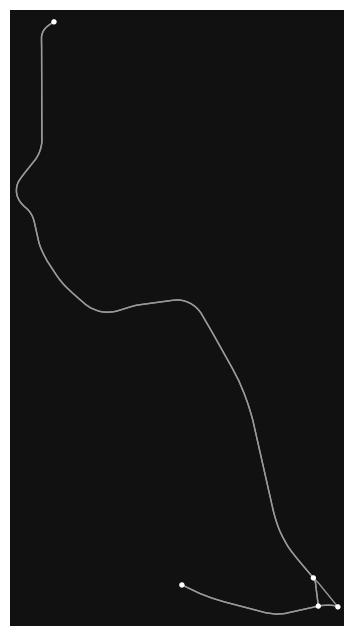

/tmp/ipykernel_3040/1802850424.py:31: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  map_osm = ox.plot_graph_folium(graph, edge_width=2)


In [7]:
import osmnx as ox
import folium

ox.config(use_cache=True, log_console=True)

# 峠道
graph = ox.graph_from_point(center_point=(35.33456,136.98990)
                                , network_type='all'
                                , dist=1000
                                , custom_filter='["highway"~"tertiary|secondary|primary"]')

def count_branches(G):
    count = {}
    for u, v, data in G.edges(keys=False, data=True):
        if 'junction' in data and data['junction'] == 'roundabout':
            continue  # ラウンドアバウトは除外
        if u not in count:
            count[u] = 0
        if v not in count:
            count[v] = 0
        count[u] += 1
        count[v] += 1
    return count

# エッジの分岐数を計算
branches = count_branches(graph)
ox.save_graphml(graph,filepath='branch.graphml')

ox.plot_graph(graph)

map_osm = ox.plot_graph_folium(graph, edge_width=2)
map_osm